# Assignment 1 - Exercise Setup
This notebook contains the necessary code setup for the accompanying exercises. 

# 1. Coordinate Descent

In [33]:
import numpy as np
def argmin_x1(x):
      return x[2] + (3/2)*x[1] - 0.5

def argmin_x2(x):
    return (1/6)*(x[0] + 2*x[2] + 5)

def argmin_x3(x):
    return (1/4)*(x[0] + 3*x[1] - 4)

def f(x):
    return np.exp(x[0] - 3*x[1] + 3) + \
           np.exp(3*x[1] - 2*x[2] - 2) + \
           np.exp(2*x[2] - x[0] + 2)

def coordinate_descent(f, argmin, x0, max_iter=100, verbose=False):
    x = np.array(x0, dtype=float)
    # to track the trajectory of x
    history = [x.copy()]

    for t in range(max_iter):
        for i in range(len(x)):
             # in-place update
            x[i] = argmin[i](x)
        history.append(x.copy())

    return x

#1a
x_0 = [4, 3, 2]
print(argmin_x1(x_0))
print(argmin_x2(x_0))
print(argmin_x3(x_0))

#1b
x_0 = [1, 20, 5]
argmin = [argmin_x1, argmin_x2, argmin_x3]
x = coordinate_descent(f, argmin, x_0, max_iter=25)

print(x[0])
print(x[1])
print(x[2])
print(f(x))

6.0
2.1666666666666665
2.25
26.66666666666666
9.555555555555554
12.83333333333333
8.154845485377136


# 2. Gradient Descent

In [34]:
def f(u, v):
    return (u**2 + v - 11)**2 + (u + v**2 - 7)**2

def grad_f(u, v):
    df_du = 2 * (u**2 + v - 11) * (2*u) + 2 * (u + v**2 - 7)
    df_dv = 2 * (u**2 + v - 11) + 2 * (u + v**2 - 7) * (2*v)
    return np.array([df_du, df_dv])

def gradient_descent(f, grad_f, eta, u0, v0, max_iter=100) -> tuple[list, list]:
    x0 = [u0, v0]
    x = np.array(x0, dtype=float)
    path = [x0]
    values = [f(x[0], x[1])]
    for t in range(1, max_iter):
        eta_t = eta(t)
        g = grad_f(x[0], x[1])
        x = x - eta_t * g
        path.append(x)
        values.append(f(x[0], x[1]))
    return values, path

def eta_const(t,c=1e-3) -> float:
    return lambda t: c

def eta_sqrt(t,c=1e-3) -> float:
    return  lambda t:( c / np.sqrt(t + 1) )

def eta_multistep(t, milestones=[30, 80, 100], c=1e-3, eta_init=1e-3) -> float:
    """
    Multi-step: each time t passes a milestone, multiply eta_init by c.
    E.g., if milestones=[30,80], c=0.1, eta_init=1e-3:
      t<30: eta=1e-3
      30<=t<80: eta=1e-4
      80<=t: eta=1e-5
    """
    drops = sum(t >= m for m in milestones)
    return eta_init * (c ** drops)

def find_min(min_f, path):
    for i in range(1,100):
        x = path[i]
        f_x = f(x[0], x[1])
        if f_x<min_f:
            min_f = f_x
    return min_f

x_0 = (4, -5)
max_iter = 100

#2a
values, path = gradient_descent(f, grad_f, eta_const(1e-3), x_0[0], x_0[1], max_iter)
print(values[99])
min_f = 10000000
print(find_min(min_f, path))

#2b
values, path = gradient_descent(f, grad_f, eta_sqrt(1e-3), x_0[0], x_0[1], max_iter)
print(values[99])
min_f = 10000000
print(find_min(min_f, path))

#2c
values, path = gradient_descent(f, grad_f, lambda t: eta_multistep(t, milestones=[30, 80, 100], c=0.1, eta_init=1e-3), x_0[0], x_0[1], max_iter)
print(values[99])
min_f = 10000000
print(find_min(min_f, path))

#2d
x_0 = (-4, 0)
values, path = gradient_descent(f, grad_f, eta_const(1e-3), x_0[0], x_0[1], max_iter)
print(values[99])
print(path[99])

x_0 = (0, 0)
values, path = gradient_descent(f, grad_f, eta_const(1e-3), x_0[0], x_0[1], max_iter)
print(values[99])
print(path[99])

x_0 = (4, 0)
values, path = gradient_descent(f, grad_f, eta_const(1e-3), x_0[0], x_0[1], max_iter)
print(values[99])
print(path[99])

x_0 = (0, 4)
values, path = gradient_descent(f, grad_f, eta_const(1e-3), x_0[0], x_0[1], max_iter)
print(values[99])
print(path[99])

x_0 = (5, 5)
values, path = gradient_descent(f, grad_f, eta_const(1e-3), x_0[0], x_0[1], max_iter)
print(values[99])
print(path[99])

0.030757893214651656
0.030757893214651656
14.65275553453456
14.65275553453456
2.589840551681308
2.589840551681308
96.45134523450776
[-3.14964972 -0.70105694]
0.3093895537566177
[2.90366768 2.09454269]
11.238036094556296
[ 3.44957105 -0.4745142 ]
5.8598722120101145
[-2.34403066  3.09835026]
0.028026062567519532
[2.98173939 2.04249722]


# 3. Polynomial Regression

In [54]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import PolynomialFeatures
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame

data = housing.data


# plt.figure()
# plt.scatter(df['MedInc'], df['target'], alpha=0.5)
# plt.show()

# View the first few rows
df.head()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [55]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Let's separate features and target for clarity
features = df.drop(columns=["MedHouseVal"])
target = df["MedHouseVal"]

# Standardize the features
# Your Code Here
scaler = sklearn.preprocessing.StandardScaler()
scaled_features = scaler.fit_transform(features)

# Split the dataset (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

# Polynomial features
DEGREE = 1 #1 for linear, 2 for 2nd degree polynomial
poly = PolynomialFeatures(DEGREE)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

#Equation from lecture
XTX = np.matmul(X_train_poly.T, X_train_poly)
XTy = np.matmul(X_train_poly.T, y_train)
b = np.linalg.inv(XTX) @ XTy

# calculate MSE
y_pred = np.matmul(X_val_poly, b)
mse = np.mean((y_val - y_pred) ** 2)
print("MSE:", mse)
# Get feature names
names = poly.get_feature_names_out(features.columns)
# dictionary: {feature_name: coefficient}
coef_dict = dict(zip(names, b))

if DEGREE == 2:
    print("β_MedInc =", coef_dict["MedInc"])
    print("β_MedInc:AveBedrms =", coef_dict["MedInc AveBedrms"])
    print("β_HouseAge:AveBedrms =", coef_dict["HouseAge AveBedrms"])
elif DEGREE == 1:
    print("β_MedInc =", coef_dict["MedInc"])
    print('β_AveBedrms =', coef_dict["AveBedrms"])
    print('β_HouseAge=', coef_dict["HouseAge"])



MSE: 0.5558915986952443
β_MedInc = 0.8523816881485101
β_AveBedrms = 0.3711318828486203
β_HouseAge= 0.12238223843286619


In [37]:
#3D
# The given objective is convexsince it is the sum of convex functions.
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
import numpy as np

# Load and prepare data
df = fetch_california_housing(as_frame=True).frame
features = df.drop(columns=["MedHouseVal"])
target = df["MedHouseVal"]

# Standardize
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split
X_train, X_val, y_train, y_val = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Polynomial transformation
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

# Ridge regression solution
lambda_ = 0.001
n = X_train_poly.shape[1]
I = np.eye(n)

XTX = X_train_poly.T @ X_train_poly
XTy = X_train_poly.T @ y_train
b = np.linalg.inv((1/n) * XTX + lambda_ * I) @ (XTy/n)

# Predict and evaluate
y_pred = X_val_poly @ b
mse_ridge = np.mean((y_val - y_pred) ** 2)

# dictionary: {feature_name: coefficient
feature_names = poly.get_feature_names_out(features.columns)
coef_dict = dict(zip(feature_names, b))

# Output requested values
print("MSE (Ridge):", mse_ridge)
print("β_MedInc =", coef_dict["MedInc"])
print("β_MedInc:AveBedrms =", coef_dict["MedInc AveBedrms"])
print("β_HouseAge:AveBedrms =", coef_dict["HouseAge AveBedrms"])

MSE (Ridge): 0.46421857544254685
β_MedInc = 0.9345539556201442
β_MedInc:AveBedrms = -0.13111294707217935
β_HouseAge:AveBedrms = 0.057220670341427


# 4. Bias and Variance
You can calculate the results manually, or use whatever code you would like.

In [38]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def f_1(x):
    return 2*x+4

def f_2(x):
    return x+0.1

def f_3(x):
    return 3*x+0.7

x_0=0
f_values = [f_1(0), f_2(0), f_3(0)]
sample_mean = np.mean(f_values)
# print(f"{sample_mean=}")
bias = abs(sigmoid(x_0) - sample_mean)
print(f"{bias**2=}")
variance = np.mean([(sample_mean -f_d)**2 for f_d in f_values ])
print(f"{variance=}")



bias**2=1.2099999999999997
variance=2.940000000000001


# 5. Naive Bayes

In [39]:
from sklearn.datasets import fetch_20newsgroups
categories = ['sci.space', 'misc.forsale', 'comp.graphics', 'rec.sport.hockey']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

print(train.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality

The classes are indicated categorically with indices from zero to two by the target vector. The target names tell us which index belongs to which class.

In [40]:
y_train = train.target
y_train

array([3, 3, 1, ..., 2, 1, 0])

In [41]:
train.target_names

['comp.graphics', 'misc.forsale', 'rec.sport.hockey', 'sci.space']

We represent the documents in a bag of word format. That is, we create a data matrix ``D`` such that ``D[j,i]=1`` if the j-th document contains the i-th feature (word), and ``D[j,i]=0`` otherwise. 

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

import numpy as np
vectorizer = CountVectorizer(stop_words="english", min_df=5,token_pattern=r"[^\W\d_]+", binary=True)
D = vectorizer.fit_transform(train.data)
D_test = vectorizer.transform(test.data)

We get the allocation of feature indices to words by the following array, containing the vocabulary.

In [43]:
vectorizer.get_feature_names_out()

array(['aa', 'aargh', 'ab', ..., 'zubov', 'zv', 'zyeh'], dtype=object)

For example, the word `zubov` has the index 7383.

In [44]:
np.where(vectorizer.get_feature_names_out() == 'zubov')[0]

array([7383])

We can use np.unique to find the counts of each category. We then divide each count by the total sum to get the proportion of each category (prior probability).

In [45]:
class_labels, counts = np.unique(y_train, return_counts=True)
priors = counts / counts.sum()

for label, prior in zip(class_labels, priors):
    print(f"Class {train.target_names[label]}: Prior = {prior:4f}")


Class comp.graphics: Prior = 0.247248
Class misc.forsale: Prior = 0.247671
Class rec.sport.hockey: Prior = 0.254022
Class sci.space: Prior = 0.251058


Since the domain of the feature $x_{"chips"}$ is 1 and 0. We get that $|X_{"chips"}|=2$. From this we can calculate the log-probabilities with Laplace Smoothing.

In [46]:
chip_index = vectorizer.vocabulary_["chip"]
alpha = 1 * 10**(-5)
class_names = train.target_names
chip_column = D[:, chip_index].toarray().flatten()
for label in class_labels:
  class_mask = y_train == label
  n_docs_in_class = np.sum(class_mask)
  n_chip_in_class = np.sum(chip_column[class_mask])

  likelihood = (n_chip_in_class + alpha) / (n_docs_in_class + 2 * alpha)
  log_likelihood = np.log(likelihood)
  print(f" Class '{class_names[label]}': log(p(x_chip = 1 | class)) = {log_likelihood:.4f}")


 Class 'comp.graphics': log(p(x_chip = 1 | class)) = -4.1727
 Class 'misc.forsale': log(p(x_chip = 1 | class)) = -4.0690
 Class 'rec.sport.hockey': log(p(x_chip = 1 | class)) = -4.6052
 Class 'sci.space': log(p(x_chip = 1 | class)) = -6.3852


Using this method and taking into account the log probabilites we can compute the posterior probabilities.

In [47]:
words = ["electronics", "sale", "games", "ball"]
log_likelihoods= {}
for word in words:
    if word in vectorizer.vocabulary_:
        word_idx = vectorizer.vocabulary_[word]
        word_presence = D[:, word_idx].toarray().flatten()
        
        log_prob_word_given_class = []
        for label in np.unique(y_train):
            class_mask = (y_train == label)
            n_docs_in_class = np.sum(class_mask)
            n_word_in_class = np.sum(word_presence[class_mask])
            
            prob = (n_word_in_class + alpha) / (n_docs_in_class + 2 * alpha)
            log_prob_word_given_class.append(np.log(prob))
        
        log_likelihoods[word] = log_prob_word_given_class

log_posteriors = {}
for word in words:

    log_joint = np.array(log_likelihoods[word]) + priors
    log_p_word = np.logaddexp.reduce(log_joint)
    log_posteriors[word] = log_joint - log_p_word

posteriors = {word: np.exp(log_posteriors[word]) for word in words}

for word in words:
    print(f"\nWord: '{word}'")
    for label in np.unique(y_train):
        print(
            f"  p(y={label} | x_{word}=1) = {posteriors[word][label]:.4f}  "
            f"({class_names[label]})"
        )


Word: 'electronics'
  p(y=0 | x_electronics=1) = 0.2114  (comp.graphics)
  p(y=1 | x_electronics=1) = 0.4751  (misc.forsale)
  p(y=2 | x_electronics=1) = 0.0000  (rec.sport.hockey)
  p(y=3 | x_electronics=1) = 0.3135  (sci.space)

Word: 'sale'
  p(y=0 | x_sale=1) = 0.0027  (comp.graphics)
  p(y=1 | x_sale=1) = 0.9579  (misc.forsale)
  p(y=2 | x_sale=1) = 0.0157  (rec.sport.hockey)
  p(y=3 | x_sale=1) = 0.0238  (sci.space)

Word: 'games'
  p(y=0 | x_games=1) = 0.0301  (comp.graphics)
  p(y=1 | x_games=1) = 0.2509  (misc.forsale)
  p(y=2 | x_games=1) = 0.6991  (rec.sport.hockey)
  p(y=3 | x_games=1) = 0.0199  (sci.space)

Word: 'ball'
  p(y=0 | x_ball=1) = 0.1686  (comp.graphics)
  p(y=1 | x_ball=1) = 0.0842  (misc.forsale)
  p(y=2 | x_ball=1) = 0.3305  (rec.sport.hockey)
  p(y=3 | x_ball=1) = 0.4167  (sci.space)


# 6. Decision Trees

In [48]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
print(df)
print(iris.DESCR)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

In [49]:
#6a
import math
def get_class_prob(target):
    """Returns a tuple (setosa_prob, versicolor_prob, virginica_prob) of target y"""
    setosa_prob= np.count_nonzero(target==0)/len(target)
    versicolor_prob = np.count_nonzero(target==1)/len(target)
    virginica_prob = np.count_nonzero(target==2)/len(target)
    return setosa_prob, versicolor_prob, virginica_prob

def entropy(y):
    if len(y) == 0:
        return 0
    classes_prob = get_class_prob(y)
    """Calcs entropy of tuple (setosa_prob, versicolor_prob, virginica_prob)"""
    setosa_probability= classes_prob[0]
    versicolor_probability = classes_prob[1]
    virginica_probability = classes_prob[2]
    return - (versicolor_probability * math.log(versicolor_probability) + 
                  setosa_probability * math.log(setosa_probability) + 
                  virginica_probability * math.log(virginica_probability))

root_entropy = entropy(y)
print(f"{root_entropy=}")

#6b

mean_sepal_width = np.mean(X[:, 1])
l0_mask = X[:,1] <= mean_sepal_width
l0 = X[l0_mask]
y0 = y[l0_mask]
l1_mask = X[:,1] > mean_sepal_width
l1 = X[l1_mask]
y1 = y[l1_mask]
assert l0.shape[0] + l1.shape[0] == X.shape[0], "dimension mismatch"


information_gain = root_entropy - ((len(y0)/len(y)) *  entropy(y0)  + (len(y1)/len(y)) * entropy(y1))
print(f"{information_gain=}")


root_entropy=1.0986122886681096
information_gain=0.18065570889289262


# 7. Support Vector Machines

In [50]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split


# Set random seed for reproducibility
seed = 42
np.random.seed(seed)

# Load digits dataset
digits = datasets.load_digits()
X, y = digits.data, digits.target

# Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [51]:
from sklearn.svm import SVC
import sklearn
from collections import Counter

#7a
svm = SVC(gamma=0.0012, C=0.85 )
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
print(f"{accuracy=}")

#7c
all_sv = svm.n_support_
total_sv = sum(all_sv)

support_indices = svm.support_
support_labels = y_train[support_indices]
mask_01 = (support_labels == 0) | (support_labels == 1)
support_labels_01 = support_labels[mask_01]
counts = Counter(support_labels_01)

print(f"Support vectors for digit 0: {counts[0]}")
print(f"Support vectors for digit 1: {counts[1]}")
print(f"Total support vectors: {counts[0] + counts[1]}")


accuracy=0.9907407407407407
Support vectors for digit 0: 38
Support vectors for digit 1: 84
Total support vectors: 122


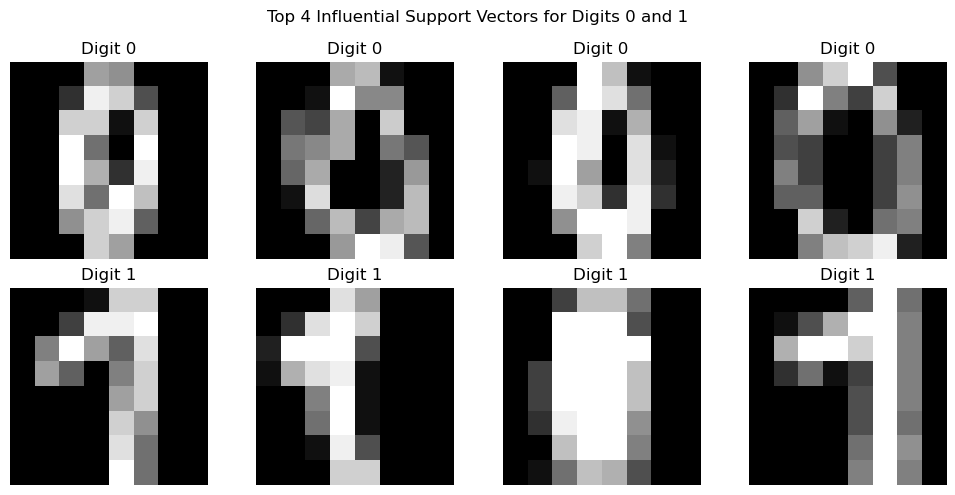

In [52]:

support_vectors = X_train[support_indices]
dual_coefs = np.abs(svm.dual_coef_[0])  # shape (n_support_vectors,)

# Filter for class 0 and 1 support vectors
filtered_sv = support_vectors[mask_01]
filtered_duals = dual_coefs[mask_01]

fig, axs = plt.subplots(2, 4, figsize=(10, 5))
for i, digit in enumerate([0, 1]):
    # Mask and sort by influence
    mask = (support_labels_01 == digit)
    top_indices = np.argsort(filtered_duals[mask])[::-1][:4]
    top_sv = filtered_sv[mask][top_indices]

    # Plot the top 4 support vectors
    for j, sv in enumerate(top_sv):
        axs[i, j].imshow(sv.reshape(8, 8), cmap='gray')
        axs[i, j].axis('off')
        axs[i, j].set_title(f'Digit {digit}')

plt.suptitle("Top 4 Influential Support Vectors for Digits 0 and 1")
plt.tight_layout()
plt.show()
